
# Logistic Regression ( Titanic Dataset )

We will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [23]:
train = pd.read_csv("C:\\Users\\abhij\\Downloads\\tested.csv")

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

<Axes: >

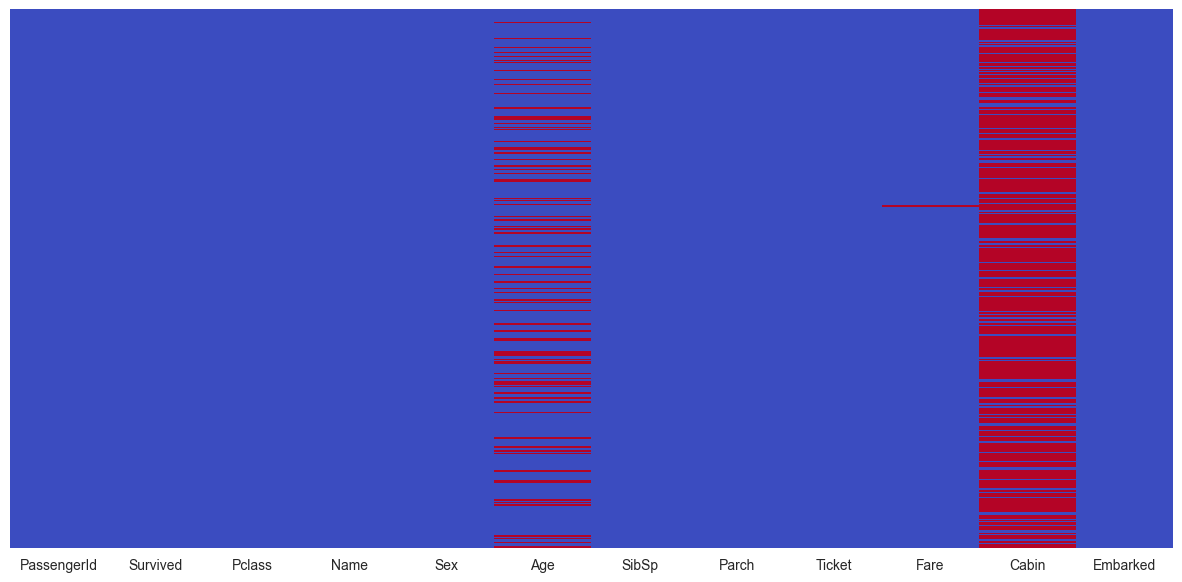

In [25]:
plt.figure(figsize=(15, 7))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

<Axes: xlabel='Survived', ylabel='count'>

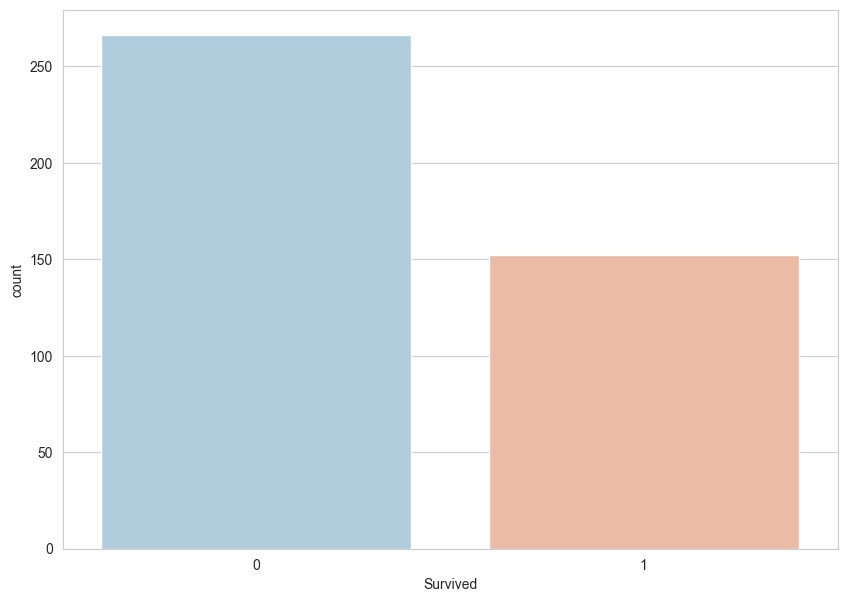

In [26]:
plt.figure(figsize=(10, 7))
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

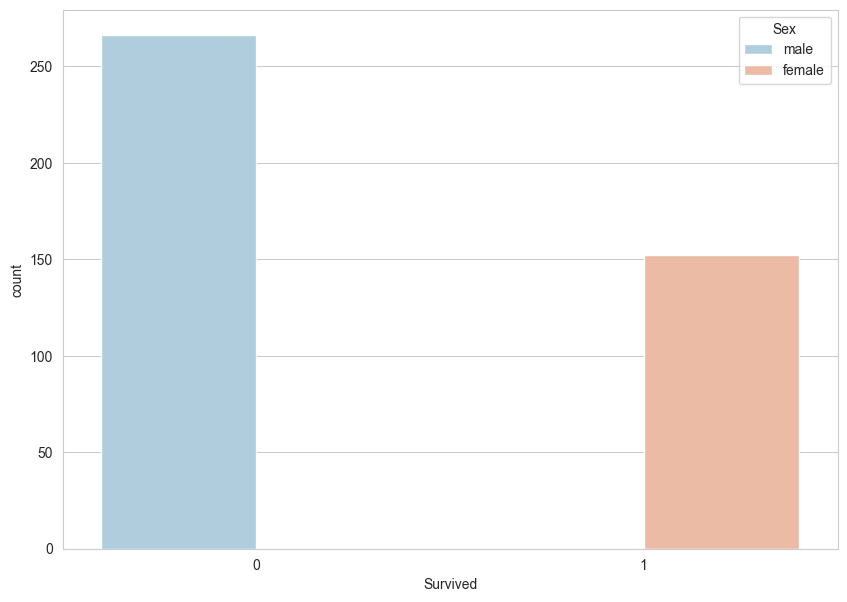

In [27]:
plt.figure(figsize=(10, 7))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

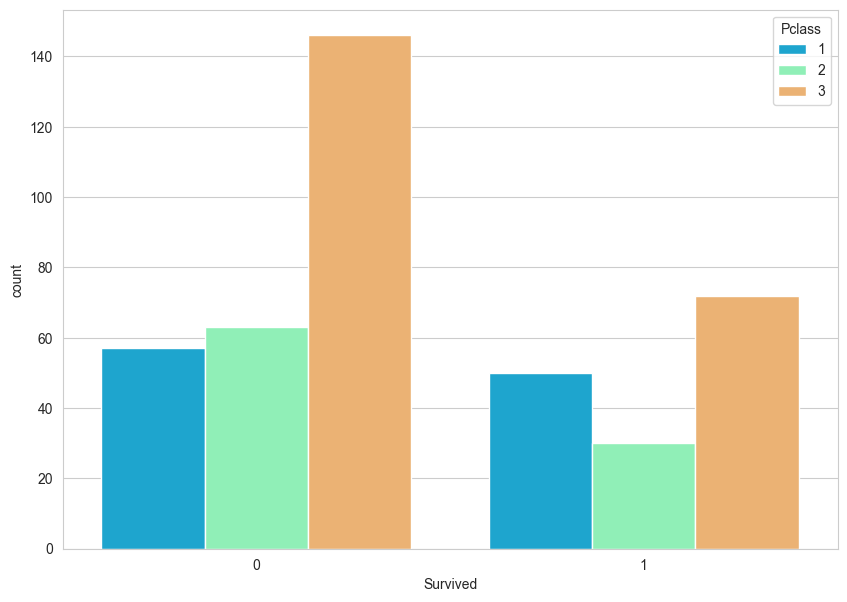

In [28]:
plt.figure(figsize=(10, 7))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<Axes: xlabel='Age'>

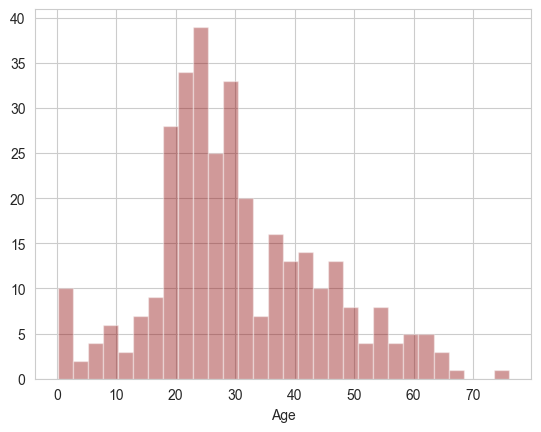

In [29]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

<Axes: >

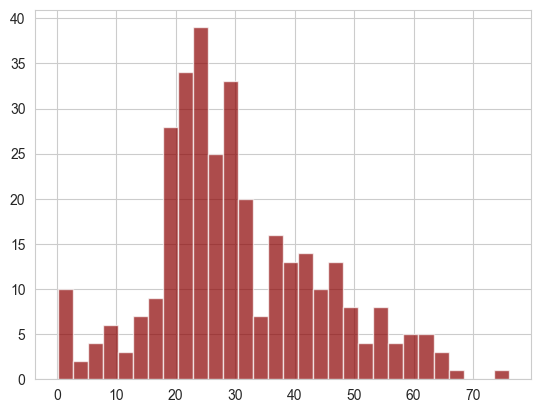

In [30]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

<Axes: xlabel='SibSp', ylabel='count'>

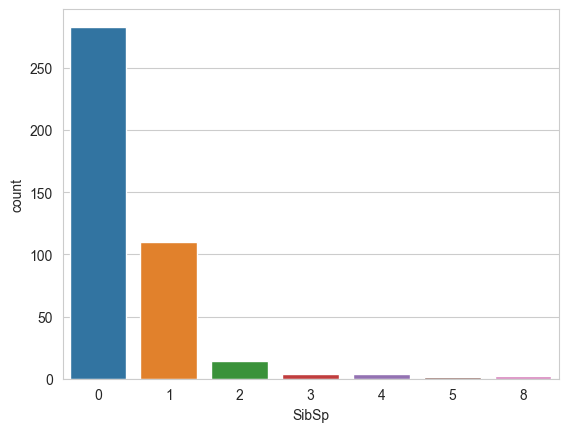

In [31]:
sns.countplot(x='SibSp',data=train)

<Axes: >

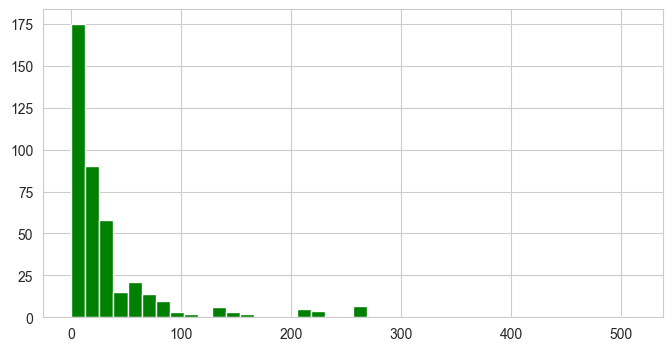

In [32]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


<Axes: xlabel='Pclass', ylabel='Age'>

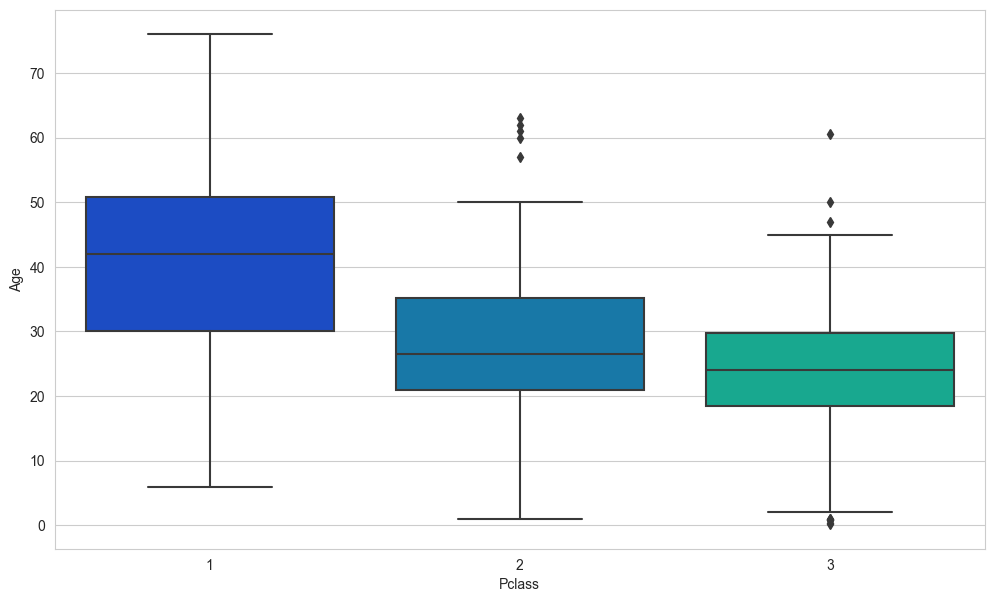

In [33]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [34]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [35]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

<Axes: >

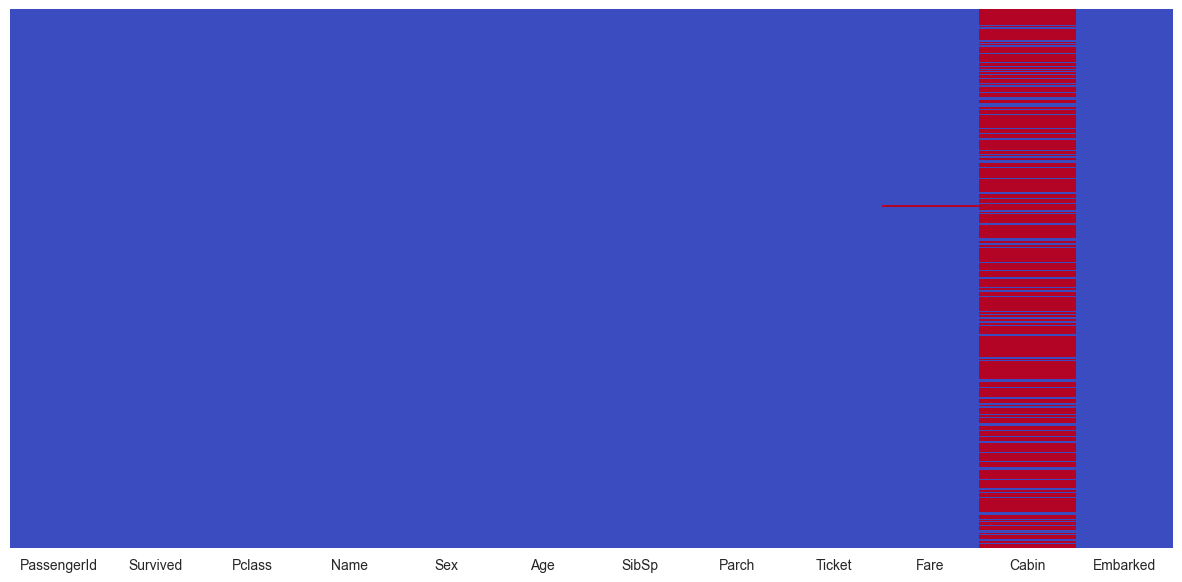

In [36]:
plt.figure(figsize=(15, 7))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [37]:
train.drop('Cabin',axis=1,inplace=True)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [39]:
train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


In [41]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [42]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [43]:
train = pd.concat([train,sex,embark],axis=1)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,True,True,False
1,893,1,3,47.0,1,0,7.0000,False,False,True
2,894,0,2,62.0,0,0,9.6875,True,True,False
3,895,0,3,27.0,0,0,8.6625,True,False,True
4,896,1,3,22.0,1,1,12.2875,False,False,True


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['male','Q','S']

for i in list:
    train[i]=le.fit_transform(train[i])
    

In [53]:
train.sample(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
338,1230,0,2,25.0,0,0,31.5000,1,0,1
118,1010,0,1,36.0,0,0,75.2417,1,0,0


In [54]:
x=train.drop(['S'],axis=1)
x

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q
0,892,0,3,34.5,0,0,7.8292,1,1
1,893,1,3,47.0,1,0,7.0000,0,0
2,894,0,2,62.0,0,0,9.6875,1,1
3,895,0,3,27.0,0,0,8.6625,1,0
4,896,1,3,22.0,1,1,12.2875,0,0
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,24.0,0,0,8.0500,1,0
414,1306,1,1,39.0,0,0,108.9000,0,0
415,1307,0,3,38.5,0,0,7.2500,1,0
416,1308,0,3,24.0,0,0,8.0500,1,0


In [55]:
y=train.iloc[:,-1]
y

0      0
1      1
2      0
3      1
4      1
      ..
413    1
414    0
415    1
416    1
417    0
Name: S, Length: 417, dtype: int64

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=i)
    modRF = RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print(f"Best Accuracy is: {maxAcc} on Random State: {maxRs}")

Best Accuracy is: 0.9404761904761905 on Random State: 90


We found best random state as 90 which will give us 94 % Accuracy

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

LOGR = LogisticRegression(solver = 'liblinear')
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
SV = SVC()
KNN = KNeighborsClassifier()
EXT=ExtraTreesClassifier()

model=[LOGR,RFC,DTC,SV,KNN,EXT]
for i in model:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=90)
    i.fit(x_train,y_train)
    predi=i.predict(x_test)
    print('performance matrix of',i,'is:')
    print("Confusion matrix :",confusion_matrix(y_test,predi))
    print("Classification report :", classification_report(y_test,predi,))
    print("Accuracy score :", accuracy_score(y_test,predi))
    print("*****************************************************************")

performance matrix of LogisticRegression(solver='liblinear') is:
Confusion matrix : [[ 9 15]
 [ 2 58]]
Classification report :               precision    recall  f1-score   support

           0       0.82      0.38      0.51        24
           1       0.79      0.97      0.87        60

    accuracy                           0.80        84
   macro avg       0.81      0.67      0.69        84
weighted avg       0.80      0.80      0.77        84

Accuracy score : 0.7976190476190477
*****************************************************************
performance matrix of RandomForestClassifier() is:
Confusion matrix : [[23  1]
 [ 2 58]]
Classification report :               precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.98      0.97      0.97        60

    accuracy                           0.96        84
   macro avg       0.95      0.96      0.96        84
weighted avg       0.97      0.96      0.96        84

Accu